This is an example of using Python calculate and plot the motion of a double pendulum. The motion is calculated by integration of a set of first-order differential equations. Order of variables in the array u[]:
1.   $u[0]= \phi_1\quad$ Angle of the upper pendulum, measured from the vertical.
1.   $u[1]=\omega_1= d\phi_1/dt\quad$  Angular velocity of the upper pendulum.
1.   $u[2]= \phi_2\quad$ Angle of the lower pendulum, measured from the vertical.
1.   $u[3]=\omega_2= d\phi_2/dt\quad$  Angular velocity of the lower pendulum.

The equations of motion follow from the Lagrangian:
$$L={1\over 2}m\ell^2\left[2\dot\phi_1^2 + \dot\phi_2^2 + 2\dot\phi_1\dot\phi_2\cos(\phi_1-\phi_2)\right]+mg\ell\left(2\cos\phi_1+\cos\phi_2\right)$$
The two Lagrange equations, then, are as follows:
$$2\ddot\phi_1+\cos(\phi_1-\phi_2)\ddot\phi_2+\sin(\phi_1-\phi_2)\dot\phi_2^2+2{g\over\ell}\sin\phi_1=0$$
$$\cos(\phi_1-\phi_2)\ddot\phi_1 + \ddot\phi_2 -\sin(\phi_1-\phi_2)\dot\phi_1^2 + {g\over\ell}\sin\phi_2=0$$
To use the Python integration routine, these two second-order differential equations have to be converted into a set of four first-order differential equations. One way to do that is to first solve the two equations for $\ddot\phi_1$ and $\ddot\phi_2$ and define new variables $\omega_1\equiv d\phi_1/dt$ and $\omega_2\equiv\phi_2/dt$. That leads to the following set of four coupled first-order differential equations in four variables $(\phi_1,\omega_1,\phi_2,\omega_2)$:
$${d\phi_1\over dt} = \omega_1$$
$$\ddot\phi_1={d\omega_1\over dt}={{g\over\ell}\left[2\sin\phi_1-\cos(\phi_1-\phi_2)\sin\phi_2\right]+\sin(\phi_1-\phi_2)\dot\phi_2^2+\cos(\phi_1-\phi_2)\sin(\phi_1-\phi_2)\dot\phi_1^2\over \cos^2(\phi_1-\phi_2)-2}$$
$${d\phi_2\over dt} = \omega_2$$
$$\ddot\phi_2={d\omega_2\over dt}={2{g\over\ell}\left[\cos(\phi_1-\phi_2)\sin\phi_1-\sin\phi_2\right]+\cos(\phi_1-\phi_2)\sin(\phi_1-\phi_2)\dot\phi_2^2+2\sin(\phi_1-\phi_2)\dot\phi_1^2\over 2-\cos^2(\phi_1-\phi_2)}$$
These four equations are coded into the function dudt below and form the basis of the numerical integration done by the scipy routine odeint.

In [160]:
#%matplotlib tk
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math

In [161]:
# Parameters describing the pendulum. Assume pendulum arms of equal length.
l = 0.25                     # length of each pendulum in m
g = 9.8                   # acceleration of gravity in m/s^2
alph = np.pi/4.
m = 1
R = 0.5

# Assign initial conditions to the motion.
phi10 = 0.
phi1Dot0 = 0.
phi20 = 80*math.pi/180.    # initial angle of 2nd pendulum in radians
phi2Dot0 = 0.               # initial angular velocity of 2nd pendulum
u0 = [phi10, phi1Dot0, phi20, phi2Dot0]  # initial conditions for all 4 variables
print("Initial conditions on angle 1: phi0=",phi10," omega0=",phi1Dot0)
print("Initial conditions on angle 2: phi0=",phi20," omega0=",phi2Dot0)

Initial conditions on angle 1: phi0= 0.0  omega0= 0.0
Initial conditions on angle 2: phi0= 1.3962634015954636  omega0= 0.0


In [162]:
# This function gives the time derivative of each of the 4 variables. These follow from the Lagrange equations of motion,
# but note that it is necessary to convert the two 2nd-order differential equations into four 1st-order equations.
# A good, equivalent alternative would be to use Hamilton's equations, which always are first order.
def dudt(u, t):
    r = [0., 0., 0., 0.]
    r[0] = u[1]
    r[1] = (r[3]/l)*math.sin(u[2]+alph)-(g/l)*math.sin(u[2])
    r[2] = u[3]
    r[3] = (m*l*u[3]*u[3]*math.sin(u[2]+alph) + (m+m)*g*math.sin(alph) - m*l*r[1]*math.cos(u[2]+alph))/((3/2)*m+m)
    return r

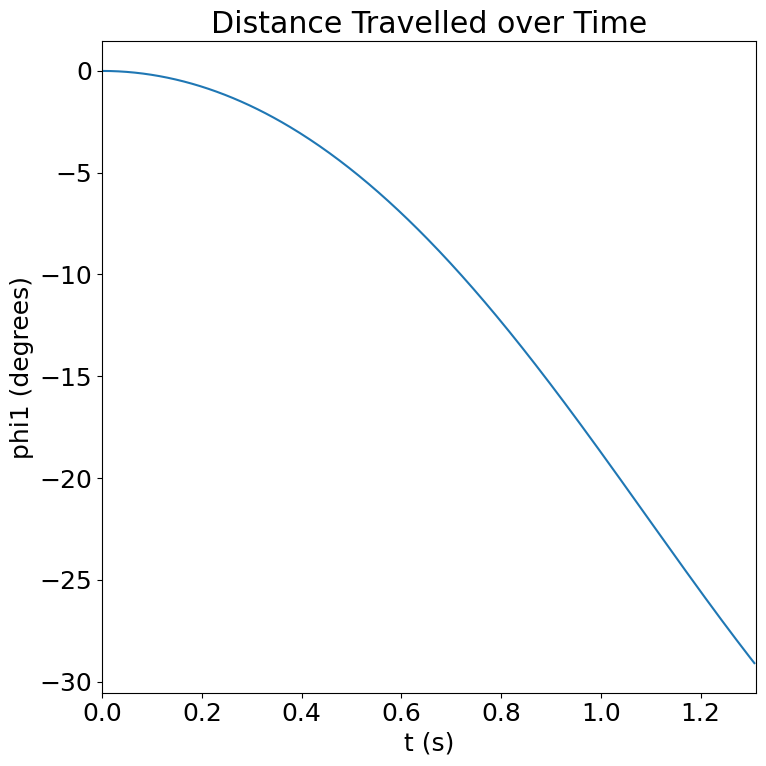

In [163]:
# Use the scipy odeint routine to carry out the numerical integration of the system of equations.
t0 = 0.                   # start time
t1 = tau1             # end time
N = 400                   # number of time steps

# Choose a set of time values at which to evaluate the solution y(t)
t = np.arange(t0,t1, (t1-t0)/N)

# Call the routing from scipy that does the integration
u = odeint(dudt, u0, t)

font = {'size'   : 18}
plt.rc('font', **font)

# Use pyplot from matplotlib to plot the motion phi1(t)
fig, ax = plt.subplots(figsize=(8,8))
plt.xlim(t0, t1)
ax.set_xlabel('t (s)')
ax.set_ylabel('phi1 (degrees)')
plt.title('Distance Travelled over Time')
ax.plot(t,u[...,0])
plt.tight_layout()
plt.show()

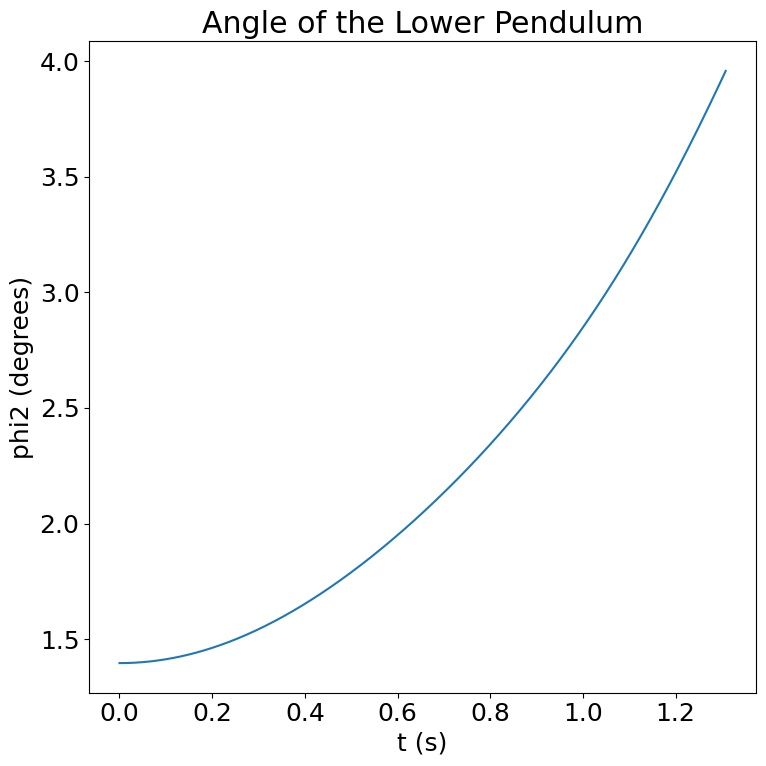

In [164]:
# Plot the motion phi2(t)
fig, ax = plt.subplots(figsize=(8,8))
#plt.xlim(t0, t1)
ax.set_xlabel('t (s)')
ax.set_ylabel('phi2 (degrees)')
ax.plot(t,u[...,2])
plt.title('Angle of the Lower Pendulum')
plt.tight_layout()
plt.show()

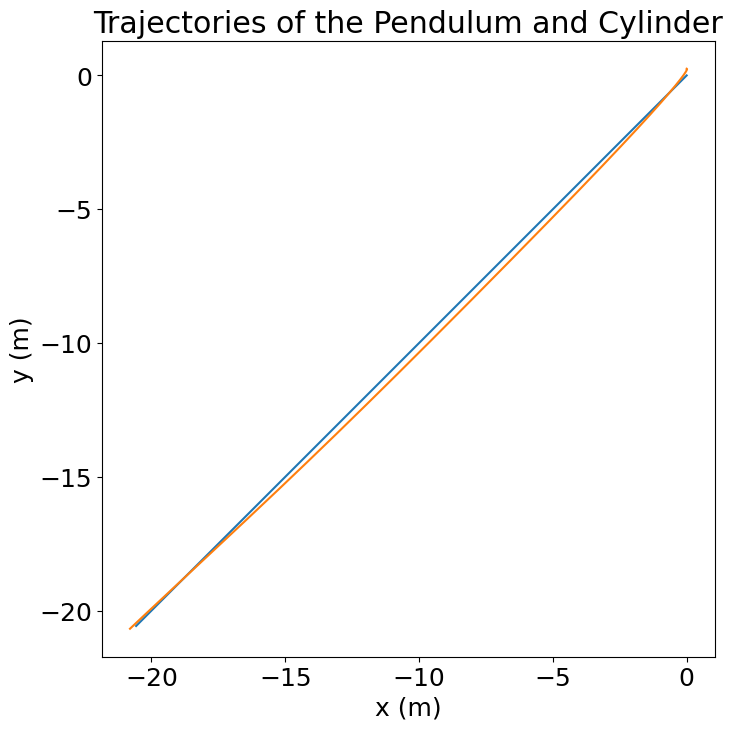

In [165]:
# Calculate and plot the 2D trajectories of both masses
X1 = np.zeros(N)
Y1 = np.zeros(N)
X2 = np.zeros(N)
Y2 = np.zeros(N)
for i in range(N):
    X1[i] = u[i, 0]*math.cos(alph)
    Y1[i] = u[i, 0]*math.sin(alph)
    X2[i] = X1[i] + l*math.sin(u[i,3])
    Y2[i] = Y1[i] + l*math.cos(u[i,3])
    
fig, ax = plt.subplots(figsize=(8,8))
#plt.xlim(-2.1*L, 2.1*L)
#plt.ylim(-2.1*L, 2.1*L)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_aspect('equal')
plt.title('Trajectories of the Pendulum and Cylinder')
ax.plot(X1,Y1)
ax.plot(X2,Y2)
plt.show()

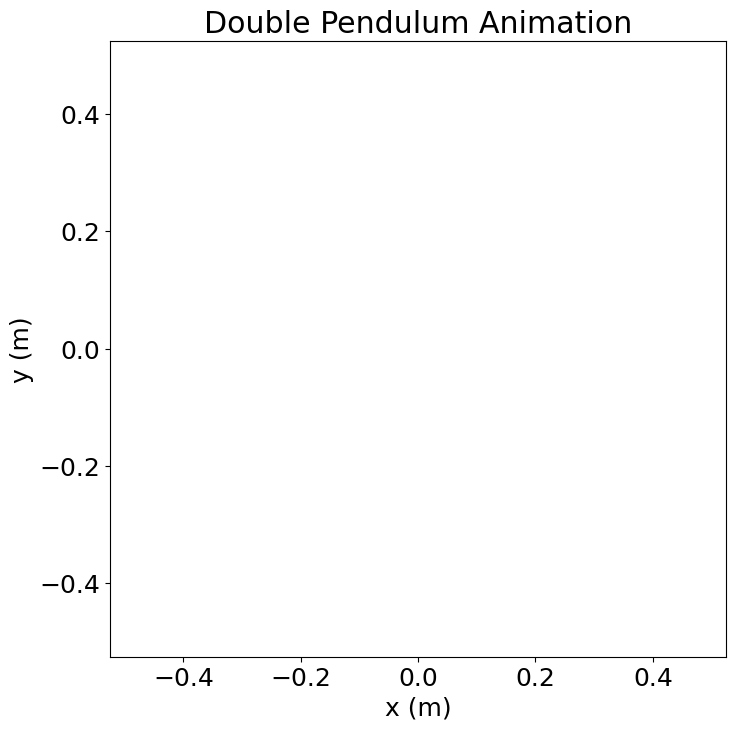

In [71]:
# Now use matplotlib to make an animation of the motion
fig = plt.figure(figsize=(8,8))
ax = plt.axes(xlim=(-2.1*L,2.1*L), ylim=(-2.1*L,2.1*L))
line, = ax.plot([],[],lw=2)
ax.set_aspect('equal')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.title('Double Pendulum Animation')
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_step = 1000.*(t1-t0)/N

def init():
    line.set_data([],[])
    time_text.set_text('')
    return line, time_text

def animate(i):
    XP = [0.,X1[i],X2[i]]
    YP = [0.,Y1[i],Y2[i]]
    line.set_data(XP,YP)
    time = i*time_step
    time_text.set_text('time=%.1f ms' % time)
    return line, time_text

# The animation is created here    
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=N, interval=time_step, blit=True)

# Save the animation to an mpeg file. This requires ffmpeg to be installed,
# with the executable in the PATH
# This takes quite a bit of time, so comment it out if not needed.
#anim.save('doublePendulum.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
   
# Display the animation
# Note that this doesn't work within Jupyter. One has to uncomment the first line of this file, so that the
# graphics get done in tk.
plt.show()